# Homework 2_1. Numpy and matplotlib

***Double Click here to edit this cell***

- Name: 허성일
- Student ID: 201603727
- Submission date: 2020.04.10

## Remark. Use numpy wherever it is possible. 


## Total: 45 pts

## Problem 1 (5 pts)

- The centroid of a finite set of $\displaystyle {k}$ points $\displaystyle \mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{k}$ in $\displaystyle \mathbb {R} ^{n}$ is
$$
\mathbf {C} ={\frac {\mathbf {x} _{1}+\mathbf {x} _{2}+\cdots +\mathbf {x} _{k}}{k}}
$$

- This point minimizes the sum of squared Euclidean distances between itself and each point in the set.
- Compute centroid
- Plot dataset and centroid 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_centroid(data):
    
# YOUR CODE MUST BE HERE

    X = data[:,0]
    Y = data[:,1]
    plt.scatter(X,Y)
    plt.scatter(np.mean(X),np.mean(Y),c='red', marker='s')
    plt.show()

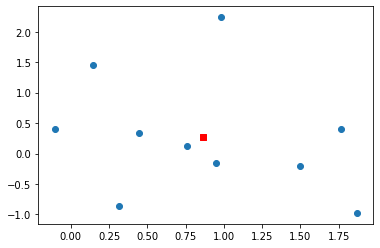

In [2]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_centroid(data)

**You output must be:**

<img src="hw2_1.png">

## Problem 2 (10 pts)

- Let $\textstyle x_{1},x_{2},\cdots ,x_{n}$ be a set of $\textstyle n$ points in a space with a distance function $d$. 
- Medoid is defined as
$$
x_{\text{medoid}} = \text{argmin}_{y \in \{x_1, x_2, \cdots, x_n\}} \sum_{i=1}^{n}d(y, x_i)
$$
- Compute medoid using Euclidean distance as a distance function.
- Plot dataset and medoid
- *Do not use sklearn, scipy or any module computing distance matrix directly*
- Use numpy functions only

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_medoid(data):
    
# YOUR CODE MUST BE HERE

    plt.scatter(data[:,0],data[:,1]) #전체
    
    Data=np.array([data]*((data.size)//2))      # data 똑같은거 data수 만큼 복제
    D=data[:, np.newaxis,:]                     #축 추가
    dist=np.sqrt(np.square(Data-D))             #broadcast '-' 해서 거리 연산
    result=np.sum(np.sum(dist,axis=2),axis=1)   #모든 거리 합
    x,y=data[np.argmin(result)]                 # 위치확인
    
    plt.scatter(x,y,c='red', marker='s')        #특정값 출력
    plt.show()

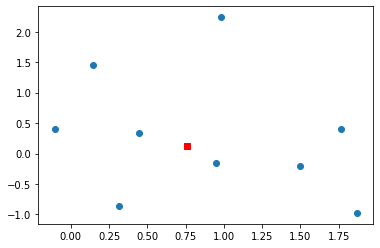

In [4]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_medoid(data)

**You output must be:**

<img src="hw2_2.png">

## Sample code

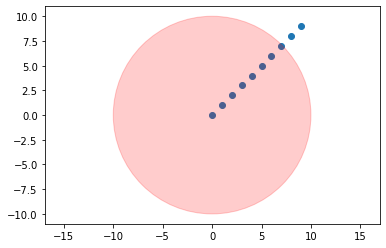

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sample_code():
    x = np.arange(10)
    y = np.arange(10)
    center = (0, 0)
    radius = 10
    plt.scatter(x, y)
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='red', alpha=0.2))
    plt.axis('equal')
    plt.show()
    
sample_code()

## Problem 3 (5 pts)

- We want to draw a scatter plot using **data**
- Plot the center using a green square symbol
- Plot points inside **radius** from center using red dots
- Plot points out of the **radius** from center using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_within_radius(data, center, radius):

# YOUR CODE MUST BE HERE

    ax =plt.gca()                                                     #바탕
    ax.add_patch(plt.Circle(center, radius, color='red', alpha=0.2))  #원그리기 
    plt.scatter(center[0], center[1], c='green', marker='s')          #중앙 Green
    
    dist=np.sqrt(np.sum(np.square(data-center), axis=1))              #거리구하기
    inner=np.where(dist<=radius)                                      #안쪽 index
    outter=np.where(dist>radius)                                      #바깥 index
                 
    plt.scatter(data[inner][:,0], data[inner][:,1], c= 'red')
    plt.scatter(data[outter][:,0], data[outter][:,1], c= 'C0')
                 
    plt.axis('equal')
    plt.show()

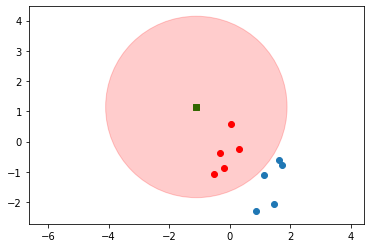

In [7]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
radius = 3.0
center = np.random.randn(2)
points_within_radius(data, center, radius)

**You output must be:**

<img src="hw2_3.png">

## Problem 4 (10 pts)

- We want to find k nearest points from the center
- Plot the center using a green square symbol
- Plot k-nearest points from center using red dots
- Plot other points using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_k_nearest(data, center, k=1):
    
# YOUR CODE MUST BE HERE

    ax =plt.gca()                                                   #바탕
    plt.scatter(center[0], center[1], c='green', marker='s')        #중앙 Green
    
    dist=np.sqrt(np.sum(np.square(data-center), axis=1))            #거리구하기
    key=np.partition(dist,k)[k-1]
    ax.add_patch(plt.Circle(center, key, color='r', alpha=0.2))     #원그리기 
    
    inner=np.where(dist<=key)
    outter=np.where(dist>key)
    plt.scatter(data[inner][:,0], data[inner][:,1], c= 'red')
    plt.scatter(data[outter][:,0], data[outter][:,1], c= 'C0') 
    
    plt.axis('equal')
    plt.show()

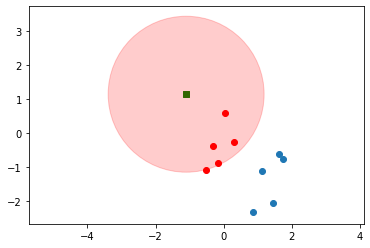

In [9]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
k = 5
center = np.random.randn(2)
points_k_nearest(data, center, k)

**You output must be:**

<img src="hw2_4.png">

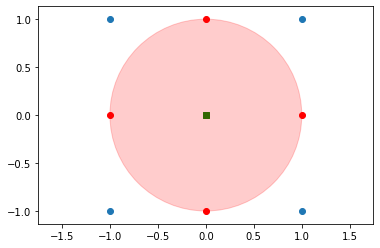

In [10]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.array([[1.,0.],[0.,1.],[-1.,0.],[0.,-1.],[1.,1.],[1.,-1.],[-1.,1.],[-1.,-1.]])
np.random.shuffle(data)
k = 1
center = np.array([0.,0.])
points_k_nearest(data, center, k)

**You output must be:**

<img src="hw2_5.png">

## Problem 5 (15 pts)

- **find_k_nearest_index** returns the index of the k-nearest
- We want to time the execution
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only
- Points: 
    - less than or equal to 1000ms: 15 pts
    - less than or equal to 10s: 10 pts
    - greater than 10s: 5 pts

In [11]:
import numpy as np

def find_k_nearest_index(data, center, k=1):

# YOUR CODE MUST BE HERE
    dist=np.sum(np.square(data-center), axis=1)
    key=np.argpartition(dist,k)[:k]
    print(repr(key))

In [13]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10000000,2)   # 10 million data
k = 5
center = np.random.randn(2)
%time find_k_nearest_index(data, center, k)

array([4362536, 6716705, 6845205, 7607470, 3146213], dtype=int64)
Wall time: 641 ms


**Your time must be around:**
```
Wall time: 419 ms
```
**You output must be:**
```
array([3146213, 4362536, 6716705, 6845205, 7607470])
```

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview"
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted
- Your homework will be graded on the basis of correctness and programming skills